# 200+ Financial Indicators of US stocks

In [1]:
# ------ >>>>> BINARY CLASSIFICATION FULL STACK <<<<< --------

# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

# ----- import các thuật toán machine learning----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------------------

# -------- import các thuật toán tính toán sai số ------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
# ------------------------------------------------------------

#### Các Feature của data thể hiện bên dưới

Data này tổng hợp 200 chỉ số tài chính từ 4391 công ty niêm yết tại Mỹ. Nguồn data có thể tải tại đây: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018
        
Dữ liệu này không lớn, nhưng số lượng Feature lớn, do đó kĩ thuật xử lí thuộc tính đầu vào khá quan trọng.

Bài viết này mình thử dùng thuật toán Machine Learning: Random Forest, để phân loại công ty nào có khả năng sinh lời trong năm, dựa vào 200 chỉ số tài chính. Kết quả chính xác của mô hình là 75.26% (acc). 

*Kiến thức người viết hạn hẹp, cũng như trong tài chính thì các chỉ số tài chính cũng ko phải là yếu tố quyết định 100% kết quả đầu tư, do đó sai số là điều không thể tránh khỏi. Hi vọng được anh em trong giới đầu tư và Data Science góp ý thêm*

#### Lê Đặng Trung Hiếu
*Phòng ABS, CTCP Chứng Khoán Bản Việt*

*Tầng 8, Sailing Tower, 111A Pasteur, Quận 1, TpHCM*

#### Các feature của Data bao gồm:

In [2]:
data = pd.read_csv(r'C:\PYTHON LEARNING\DATA\2018_Financial_Data.csv')
data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [3]:
data = data.drop(['2019 PRICE VAR [%]'],axis = 1)
eda = data

`2019 PRICE VAR [%]` là dữ liệu % tăng giảm giá của mã cổ phiếu (`Unnamed: 0`) trong dataset . Tính từ giá `open` của năm và giá `close` của năm, sau đó filter % tăng giá > 0 là 1 (xem như class đầu tư có lợi nhuận) và % tăng giá < 0 là 0 (xem như class đầu tư không lợi nhuận)

Do đó xác định target của bài toán là `Class` column trong dataset

In [4]:
target = 'Class'

### Quan sát dữ liệu thiếu (Null, NaN) trong dataset và tìm cách loại bỏ

Quan sát thấy nhiều cột trống gần hết dữ liệu, nếu dropna() là tiêu, ko còn data để chạy. Số lượng feature cũng quá nhiều, heatmap ko cho thấy rõ là missing value nằm tại vị trí column nào. Nên idea xử lí là viết hàm drop các Feature có lượng Missing > 1 ngưỡng nào đó (ở đây mình cho là 20% missing)

*Nếu chưa biết dạng chart bên dưới có thể đọc thêm về (Missing Value Heatmaps)*
*https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj*

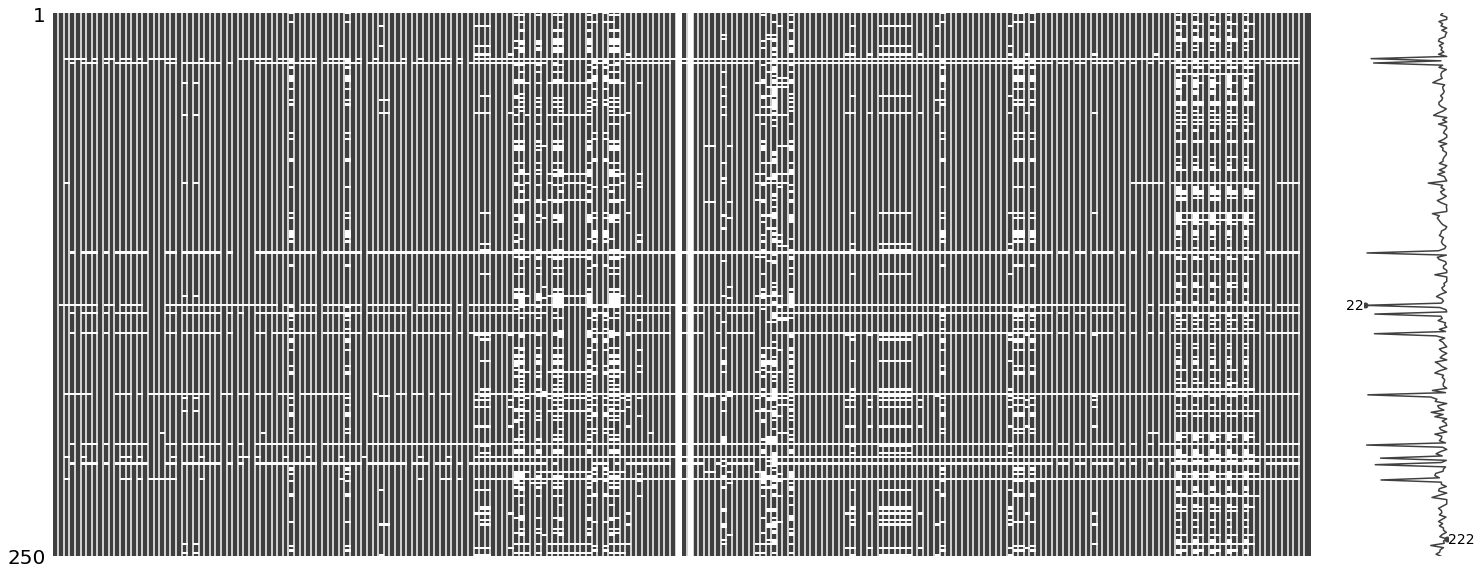

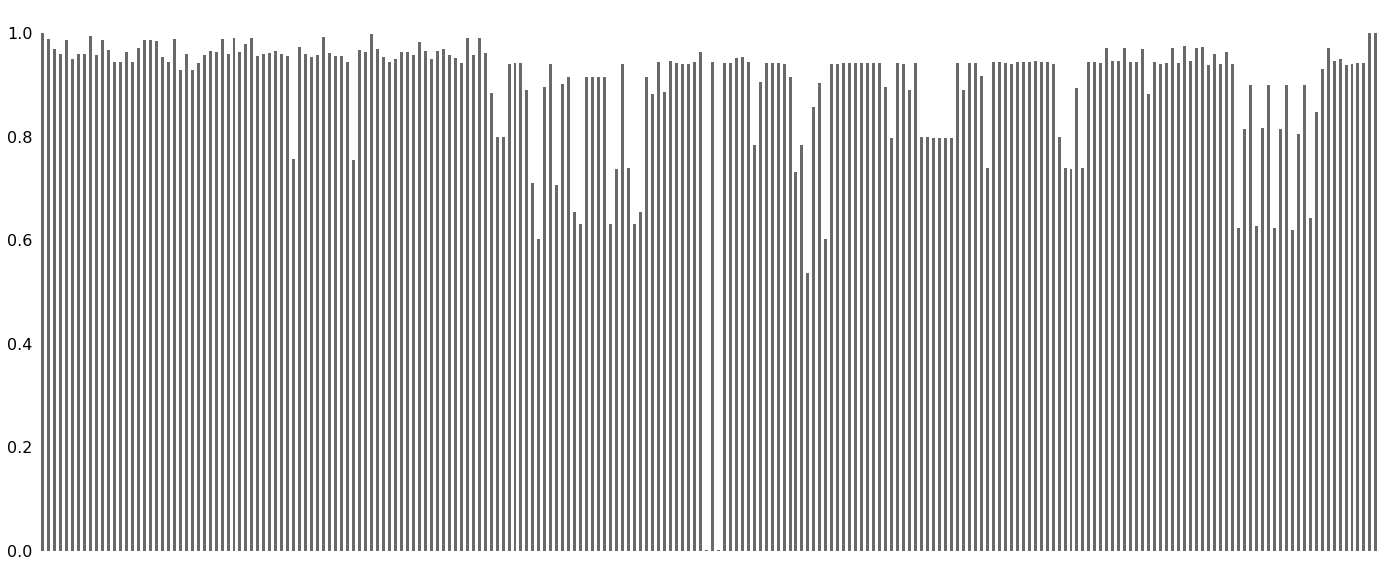

Sau khi filter thì 2 feature missing > 20% data là:

29 features with greater than 0.20 missing values.

None


['Total non-current assets',
 'Total non-current liabilities',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'enterpriseValueMultiple',
 'ebtperEBIT',
 'niperEBT',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'eBTperEBIT',
 'operatingCycle',
 'cashConversionCycle',
 'cashFlowToDebtRatio',
 'freeCashFlowOperatingCashFlowRatio',
 'cashFlowCoverageRatios',
 'shortTermCoverageRatios',
 'dividendPayoutRatio',
 'Current ratio',
 'ROIC',
 'Return on Tangible Assets',
 'Working Capital',
 '10Y Revenue Growth (per Share)',
 '10Y Operating CF Growth (per Share)',
 '10Y Net Income Growth (per Share)',
 '10Y Shareholders Equity Growth (per Share)',
 '5Y Shareholders Equity Growth (per Share)',
 '10Y Dividend per Share Growth (per Share)']

Lọc và loại bỏ các Feature có số lượng dữ liệu bị mất >20%, sau đó biểu diễn lại heatmap để quan sát kết quả

In [7]:
train = train.drop(['Total non-current assets',
                     'Total non-current liabilities',
                     'priceCashFlowRatio',
                     'priceEarningsToGrowthRatio',
                     'enterpriseValueMultiple',
                     'ebtperEBIT',
                     'niperEBT',
                     'effectiveTaxRate',
                     'returnOnAssets',
                     'returnOnCapitalEmployed',
                     'nIperEBT',
                     'eBTperEBIT',
                     'operatingCycle',
                     'cashConversionCycle',
                     'cashFlowToDebtRatio',
                     'freeCashFlowOperatingCashFlowRatio',
                     'cashFlowCoverageRatios',
                     'shortTermCoverageRatios',
                     'dividendPayoutRatio',
                     'Current ratio',
                     'ROIC',
                     'Return on Tangible Assets',
                     'Working Capital',
                     '10Y Revenue Growth (per Share)',
                     '10Y Operating CF Growth (per Share)',
                     '10Y Net Income Growth (per Share)',
                     '10Y Shareholders Equity Growth (per Share)',
                     '5Y Shareholders Equity Growth (per Share)',
                     '10Y Dividend per Share Growth (per Share)'],axis = 1)

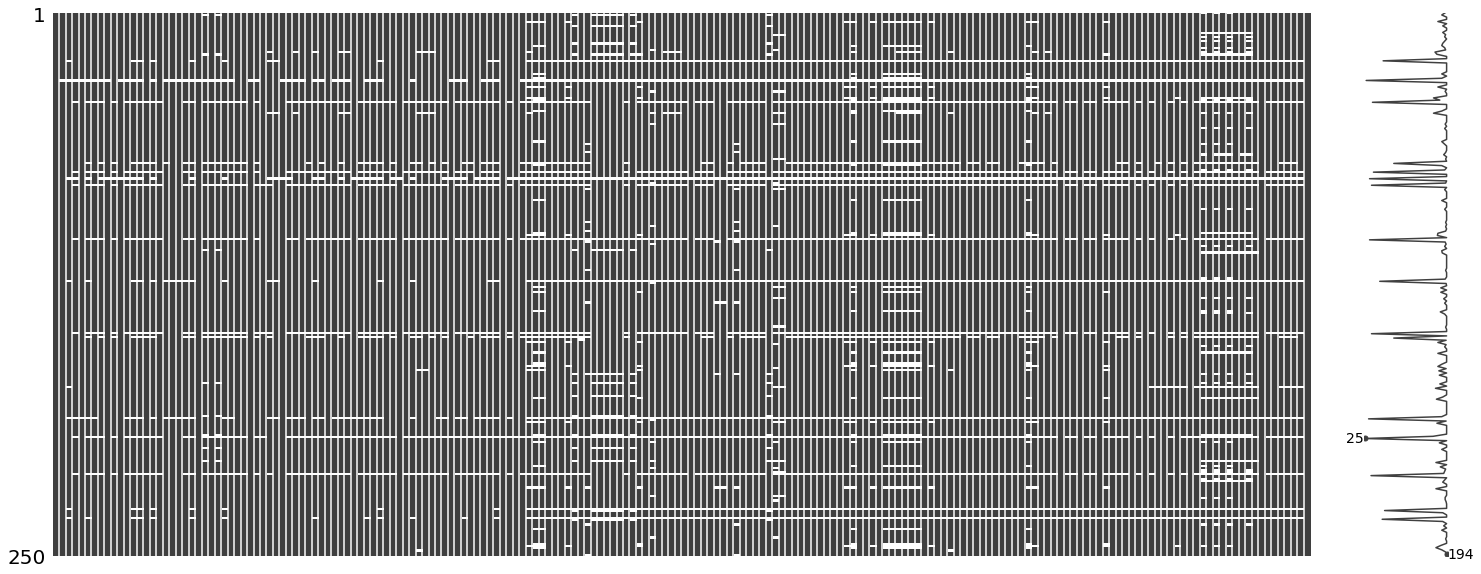

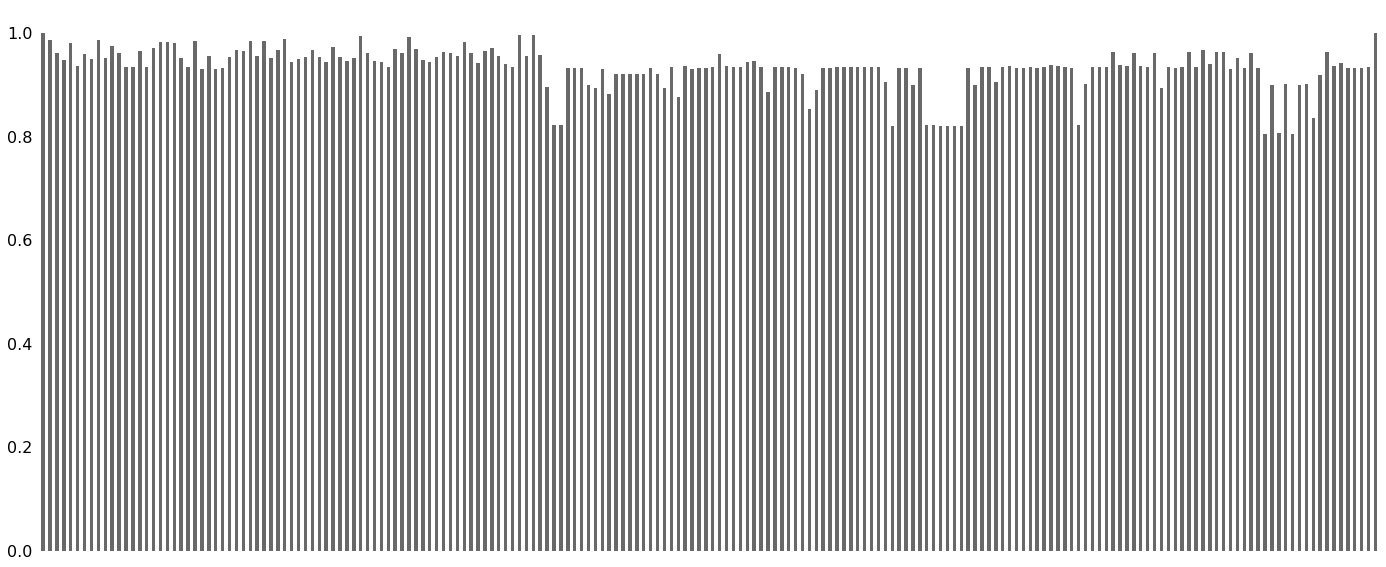

OK, sau khi quan sát lại dữ liệu sau xử lí, bây giờ đã có thể dropna(). Mình sẽ không plot lại Missing Value heatmap nữa cho đỡ mất thời gian. hiện tại bài này cũng không loại bỏ Collinear Features trong mô hình.
*Nếu chưa biết về Collinear Features bạn có thể đọc tại https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168*

Hiện tại mình loại bỏ các Zero Feature dựa trên Machine Learning để xác định các Feature cần loại bỏ. Phương pháp này tìm các tính năng quan trọng bằng cách sử dụng gradient boosting machine, có thể đọc thêm về thuật toán này tại đây [LightGBM library](http://lightgbm.readthedocs.io/en/latest/Quick-Start.html). 

*Bài sau sẽ giới thiệu rõ hơn về phương pháp loại bỏ Zero Feature này*

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.775115	valid_0's binary_logloss: 0.5124
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.773144	valid_0's binary_logloss: 0.513234
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.768053	valid_0's binary_logloss: 0.515419
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.750265	valid_0's binary_logloss: 0.528887
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.79847	valid_0's binary_logloss: 0.489521
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.792393	valid_0's binary_logloss: 0.506984
Tr

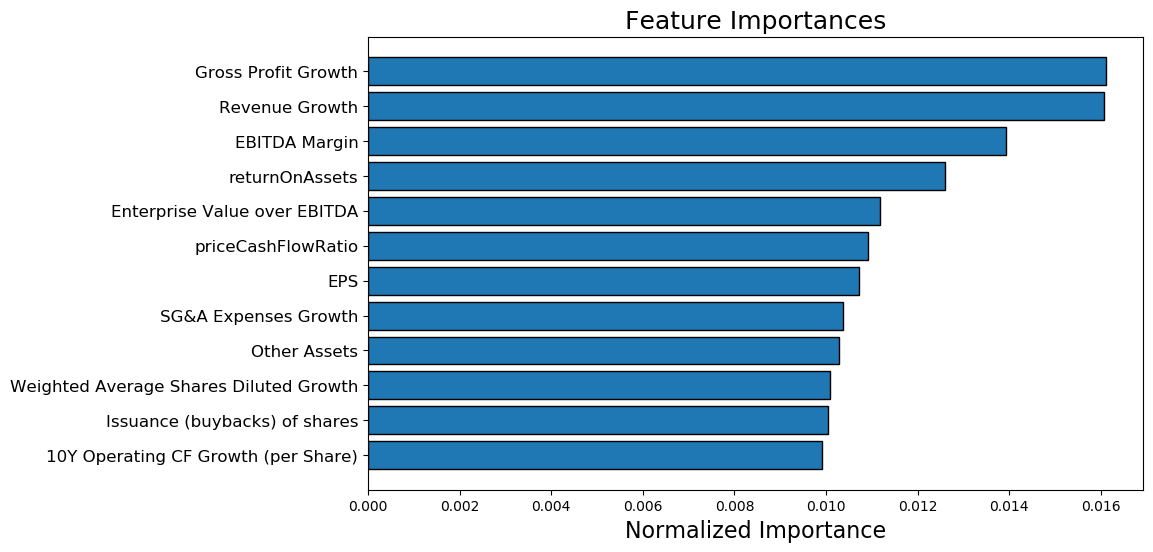

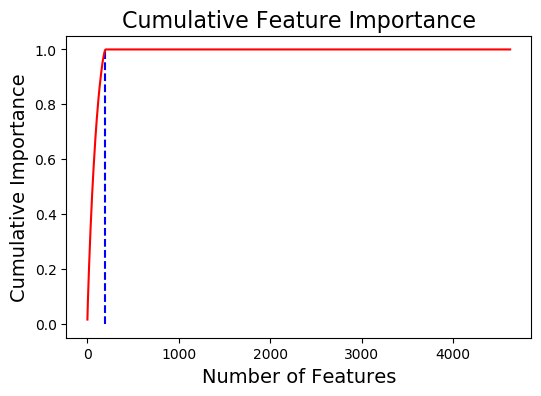

188 features required for 0.99 of cumulative importance


Phía trên mình có biểu diễn `12 Feature quan trọng`, ảnh hưởng nhiều đến bài toán phân loại như Gross Profit Growth, Revenue Growth,... Và mình cũng loại bỏ bớt các Feature ảnh hưởng ít đến mô hình, nhằm giảm tải sức nặng khi chạy thuật toán

#### Bây giờ Exploratory data analysis (EDA) nhanh trước khi chạy các thuật toán Machine Learning

Quan sát thấy số lượng mã cổ phiếu có Return dương (class = 1) lớn hơn 2 lần so với Return âm (class = 0). 2019 quả là 1 năm ngon lành với TTCK Mỹ :))

EDA xong thì thấy chỉ có 1 biến là `Category` còn lại là `Numeric`

Target looks like classification
Showing only top 10 of 191 continuous features
Linear Discriminant Analysis training set score: 0.555


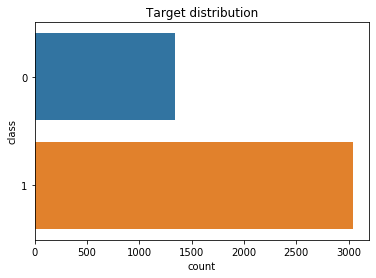

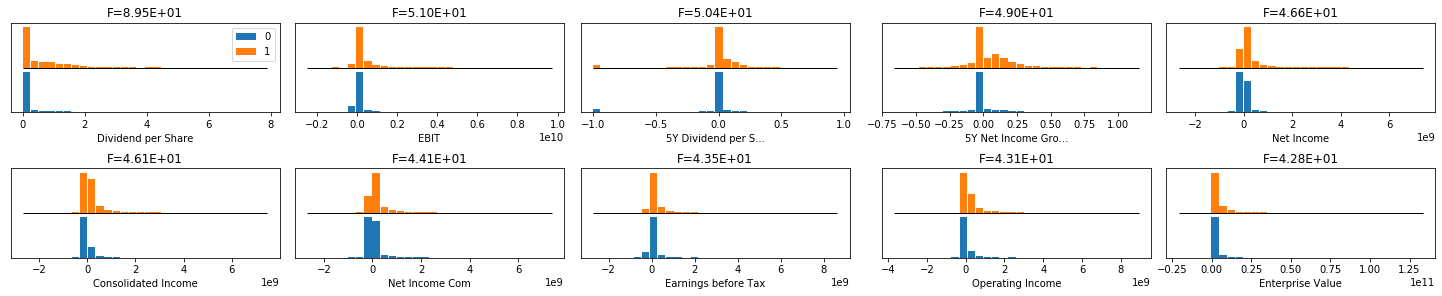

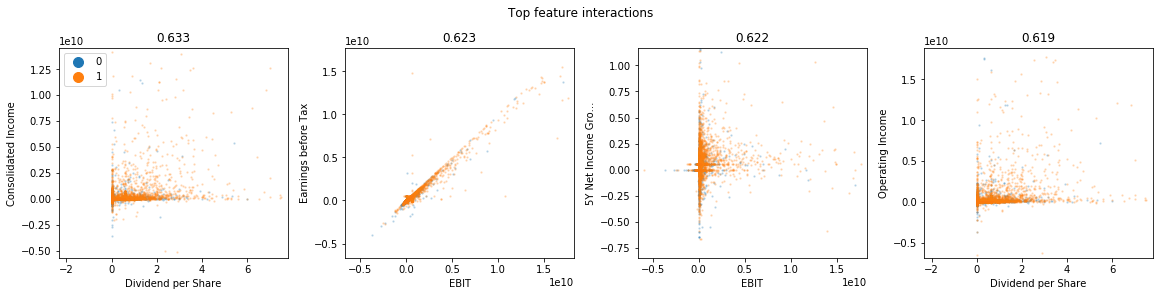

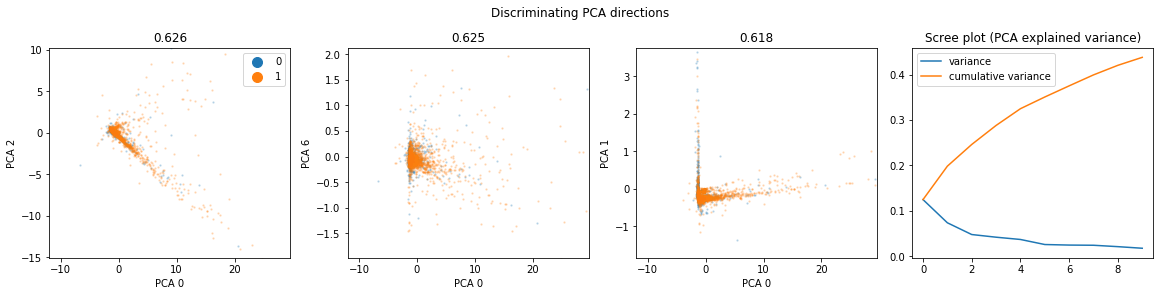

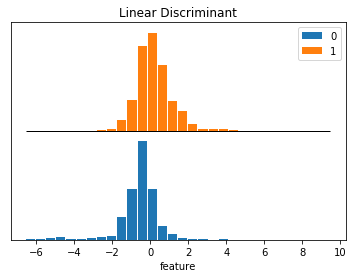

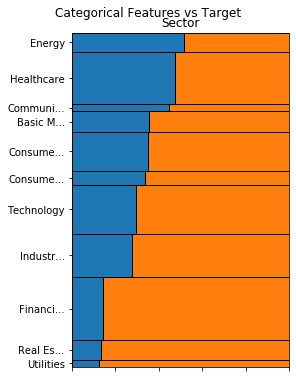

Quan sát biểu đồ `Sector` ngành thì năm qua lợi nhuận thường nằm tại nhóm cô phiếu `Real Estate`,`Financial`, `Industry`,... và ngành kém nhất là `Enegy`

### OK, giờ thì vào giai đoạn chạy Machine Learning
Ý tưởng bài viết là tìm xem các yếu tố cơ bản nào ảnh hưởng đến lợi nhuận dương và âm cuối năm.

Giờ tách data mình có ra làm 2 tệp `train`(dùng để học dữ liệu) và `test`(dùng để kiểm tra tính chính xác của mô hình).

In [44]:
data1 = eda
data1 = pd.get_dummies(data1)
data1 = data1.dropna()
from  sklearn.model_selection import train_test_split
X = data1.drop(target,axis = 1)
Y = data1[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

,Model,Accuracy Score,F1 Score
4,Random Forest,75.26,0.717252
3,Decision Tree,72.41,0.678324
5,Perceptron *,70.98,0.674960
0,Logistic Regression *,70.60,0.638537
1,K Neighbors Classifier,68.52,0.673262
6,Linear SVC *,66.71,0.664427
2,Gaussian Naive Bayes,38.60,0.337997


Lặp qua các thuật toán cơ bản, thì mình pick thuật toán `Random Forest` có acc = 75.26% (trên tập kiểm tra) làm mô hình cơ sở cho dự đoán. Sau đó sẽ tập trung làm tối ưu cho mô hình này ở những bài viết sau.

Quan sát qua kết quả giữa `Predict` và `Actual` rồi mình close topic.

In [89]:
#y_pred = random_forest.predict(X_test)
data_test = X_test
data_test['Actual'] = Y_test
data_test = data_test.sort_values(by='predict', ascending=True)
data_test

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities,predict,Actual
3805,6.085400e+07,-0.0537,2.766000e+07,33194000.0,12176000.0,46267000.0,66957000.0,-33763000.0,4063000.0,-45596000.0,...,0,0,0,1,0,0,0,0,0,0
2160,1.246850e+08,-0.1984,6.000300e+07,64682000.0,37863000.0,86987000.0,128290000.0,-63608000.0,-988000.0,-61465000.0,...,0,0,0,0,0,0,1,0,0,1
3705,1.624450e+08,-0.0196,6.741300e+07,95032000.0,0.0,33407000.0,97669000.0,-2637000.0,6584000.0,-19654000.0,...,1,0,0,0,0,0,0,0,0,0
1073,1.665250e+08,0.1862,1.738900e+08,-7365000.0,0.0,32270000.0,35243000.0,-42608000.0,14755000.0,-57363000.0,...,0,0,0,0,1,0,0,0,0,0
1724,1.564730e+08,-0.1363,6.455000e+07,91923000.0,20793000.0,120332000.0,160115000.0,-68192000.0,27658000.0,-79430000.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1.662578e+09,0.1001,9.928630e+08,669715000.0,0.0,316522000.0,514567000.0,155148000.0,7370000.0,158205000.0,...,0,0,0,1,0,0,0,0,1,1
2506,1.064722e+09,3.5019,8.876110e+08,177111000.0,0.0,122582000.0,130357000.0,46754000.0,5133000.0,43116000.0,...,0,0,0,0,0,0,0,0,1,1
113,9.023690e+08,0.4170,2.247270e+08,677642000.0,301492000.0,99856000.0,731637000.0,-53995000.0,101176000.0,-50860000.0,...,0,1,0,0,0,0,0,0,1,1
2246,1.958557e+09,0.1407,1.678100e+09,280457000.0,0.0,167715000.0,167715000.0,112742000.0,2378000.0,110627000.0,...,0,0,0,0,0,0,1,0,1,1
